In [2]:
# Basic utilities and data packages
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [4]:
!wget $data

--2025-11-03 01:07:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-11-03 01:07:47 (160 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
!head car_fuel_efficiency.csv

engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
170,3,159,3413.433758606219,17.7,2003,Europe,Gasoline,All-wheel drive,0,13.231728906241411
130,5,97,3149.6649342200353,17.8,2007,USA,Gasoline,Front-wheel drive,0,13.688217435463793
170,,78,3079.03899736884,15.1,2018,Europe,Gasoline,Front-wheel drive,0,14.246340998160866
220,4,,2542.392401828378,20.2,2009,USA,Diesel,All-wheel drive,2,16.91273559598635
210,1,140,3460.870989989018,14.4,2009,Europe,Gasoline,All-wheel drive,2,12.488369121964562
190,3,,2484.883986036068,14.7,2008,Europe,Gasoline,All-wheel drive,-1,17.271818372724237
240,7,127,3006.5422872171457,22.2,2012,USA,Gasoline,Front-wheel drive,1,13.210412112385608
150,4,239,3638.6577802809,17.3,2020,USA,Diesel,All-wheel drive,1,12.848883861524026
250,1,174,2714.219309645285,10.3,2016,Asia,Diesel,Front-wheel drive,-1,16.823553726916543


In [6]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
df.describe().round()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [9]:
print(df.isna().sum())

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


In [10]:
#Replace missing values with 0
if df.isna().any().any():
    df = df.fillna(0)
    print(df.isna().sum())
else:
    print("No missing values found in the DataFrame.")

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
# reset the index of pandas DataFrames and drop the old index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
# Verify the splits
print(f"Training set: {len(df_train)} samples ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation set: {len(df_val)} samples ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test set: {len(df_test)} samples ({len(df_test)/len(df)*100:.1f}%)")

Training set: 5822 samples (60.0%)
Validation set: 1941 samples (20.0%)
Test set: 1941 samples (20.0%)


In [14]:
# Prepare features and target
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
# Remove target from features
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [16]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [17]:
# Convert DataFrames to dictionaries
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

In [18]:
# Initialize DictVectorizer
dv = DictVectorizer(sparse=True)

# Transform the data into matrices
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [19]:
print(f"\nFeature matrix shapes:")
print(f"X_train: {X_train.shape}")


Feature matrix shapes:
X_train: (5822, 14)


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [21]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

In [22]:
# Get the feature used for splitting
feature_names = dv.get_feature_names_out()
tree_feature = feature_names[dt.tree_.feature[0]]
threshold = dt.tree_.threshold[0]
print(f"Root split feature: {tree_feature}")
print(f"Split threshold: {threshold:.3f}")
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")

Root split feature: vehicle_weight
Split threshold: 3022.107
Tree depth: 1
Number of leaves: 2


In [23]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Decision Tree with max_depth=1 - Validation RMSE: {rmse:.4f}")

Decision Tree with max_depth=1 - Validation RMSE: 1.6105


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Random Forest (n_estimators=10) - Validation RMSE: {rmse:.4f}")


Random Forest (n_estimators=10) - Validation RMSE: 0.4596


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Try different n_estimators values
n_estimators_range = range(10, 201, 10)  # 10 to 200 with step 10
rmse_scores = []
best_rmse = float('inf')
stop_improving_at = None
improvement_threshold = 0.001  # Consider improvement less than 0.001 as "stopped"

for n_est in n_estimators_range:
    rf = RandomForestRegressor(
        n_estimators=n_est,
        random_state=1,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

    print(f"n_estimators={n_est:3d}: RMSE = {rmse:.6f}")

    # Check if improvement is negligible
    if rmse < best_rmse - improvement_threshold:
        best_rmse = rmse
    else:
        if stop_improving_at is None:
            stop_improving_at = n_est

print(f"\nRMSE stopped improving at: n_estimators = {stop_improving_at}")



n_estimators= 10: RMSE = 0.459578
n_estimators= 20: RMSE = 0.453591
n_estimators= 30: RMSE = 0.451687
n_estimators= 40: RMSE = 0.448721
n_estimators= 50: RMSE = 0.446657
n_estimators= 60: RMSE = 0.445460
n_estimators= 70: RMSE = 0.445126
n_estimators= 80: RMSE = 0.444984
n_estimators= 90: RMSE = 0.444861
n_estimators=100: RMSE = 0.444652
n_estimators=110: RMSE = 0.443579
n_estimators=120: RMSE = 0.443912
n_estimators=130: RMSE = 0.443703
n_estimators=140: RMSE = 0.443355
n_estimators=150: RMSE = 0.442898
n_estimators=160: RMSE = 0.442761
n_estimators=170: RMSE = 0.442801
n_estimators=180: RMSE = 0.442362
n_estimators=190: RMSE = 0.442494
n_estimators=200: RMSE = 0.442479

RMSE stopped improving at: n_estimators = 70


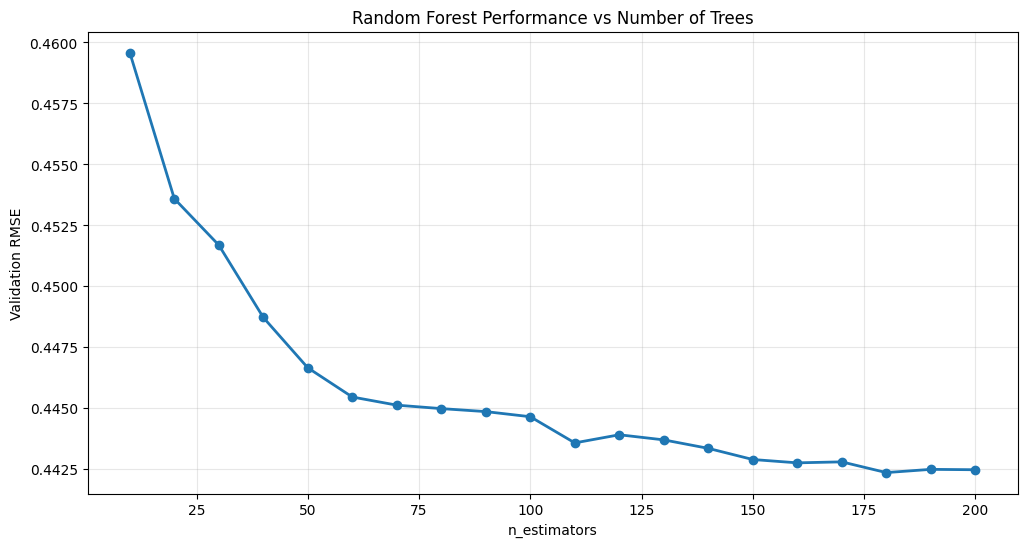


Detailed comparison around stopping point:
n_estimators=60: RMSE = 0.445460
n_estimators=70: RMSE = 0.445126
Improvement: 0.000333


In [27]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, rmse_scores, marker='o', linewidth=2, markersize=6)
plt.xlabel('n_estimators')
plt.ylabel('Validation RMSE')
plt.title('Random Forest Performance vs Number of Trees')
plt.grid(True, alpha=0.3)
plt.show()



In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Parameters to try
max_depth_values = [10, 15, 20, 25]
n_estimators_range = range(10, 201, 10)  # 10 to 200 with step 10

# Store results
results = {}

for max_depth in max_depth_values:
    rmse_scores = []

    print(f"\nTesting max_depth = {max_depth}")

    for n_est in n_estimators_range:
        rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

        if n_est % 50 == 0:  # Print progress every 50 estimators
            print(f"  n_estimators={n_est}: RMSE = {rmse:.6f}")

    # Calculate mean RMSE for this max_depth
    mean_rmse = np.mean(rmse_scores)
    results[max_depth] = {
        'mean_rmse': mean_rmse,
        'all_rmse': rmse_scores,
        'min_rmse': min(rmse_scores),
        'max_rmse': max(rmse_scores)
    }

    print(f"max_depth = {max_depth}: Mean RMSE = {mean_rmse:.6f}")

# Find the best max_depth
best_max_depth = min(results.items(), key=lambda x: x[1]['mean_rmse'])[0]
best_mean_rmse = results[best_max_depth]['mean_rmse']

print(f"\n{'='*50}")
print("RESULTS SUMMARY:")
print(f"{'='*50}")
for max_depth in max_depth_values:
    print(f"max_depth = {max_depth:2d}: Mean RMSE = {results[max_depth]['mean_rmse']:.6f} "
          f"(min: {results[max_depth]['min_rmse']:.6f}, max: {results[max_depth]['max_rmse']:.6f})")

print(f"\nBEST max_depth: {best_max_depth} with mean RMSE = {best_mean_rmse:.6f}")


Testing max_depth = 10
  n_estimators=50: RMSE = 0.441957
  n_estimators=100: RMSE = 0.441217
  n_estimators=150: RMSE = 0.439943
  n_estimators=200: RMSE = 0.439845
max_depth = 10: Mean RMSE = 0.441808

Testing max_depth = 15
  n_estimators=50: RMSE = 0.446318
  n_estimators=100: RMSE = 0.444341
  n_estimators=150: RMSE = 0.442732
  n_estimators=200: RMSE = 0.442346
max_depth = 15: Mean RMSE = 0.445417

Testing max_depth = 20
  n_estimators=50: RMSE = 0.447312
  n_estimators=100: RMSE = 0.445307
  n_estimators=150: RMSE = 0.443308
  n_estimators=200: RMSE = 0.442905
max_depth = 20: Mean RMSE = 0.446253

Testing max_depth = 25
  n_estimators=50: RMSE = 0.446901
  n_estimators=100: RMSE = 0.444778
  n_estimators=150: RMSE = 0.442937
  n_estimators=200: RMSE = 0.442479
max_depth = 25: Mean RMSE = 0.445910

RESULTS SUMMARY:
max_depth = 10: Mean RMSE = 0.441808 (min: 0.439749, max: 0.450249)
max_depth = 15: Mean RMSE = 0.445417 (min: 0.442061, max: 0.457624)
max_depth = 20: Mean RMSE = 0.

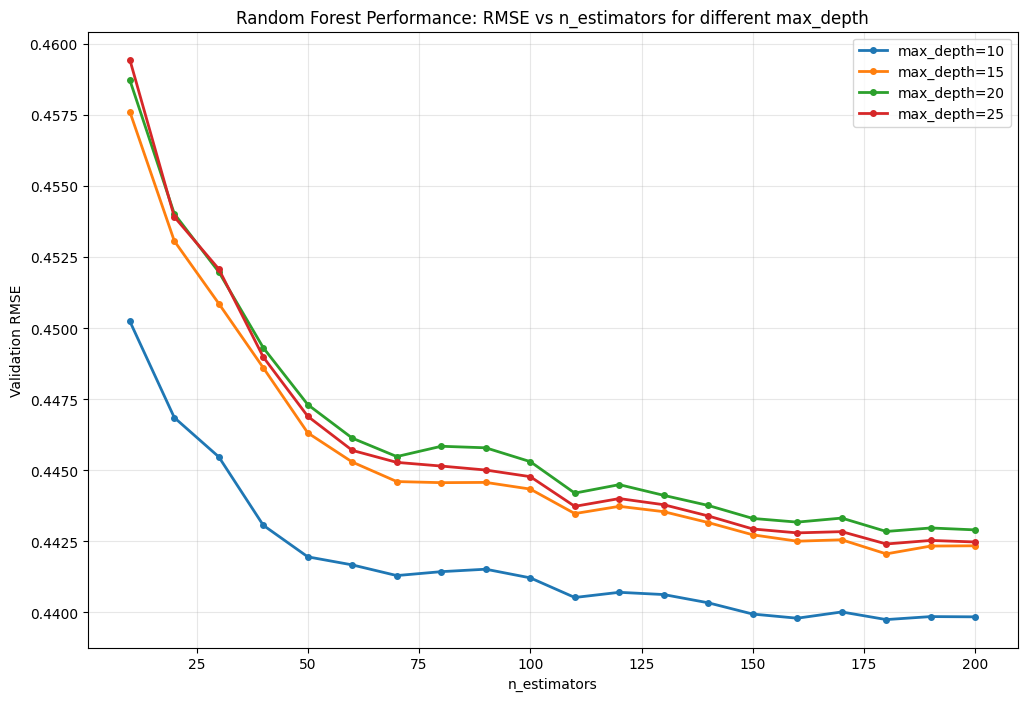

In [30]:
import matplotlib.pyplot as plt

# Plot RMSE vs n_estimators for each max_depth
plt.figure(figsize=(12, 8))

for max_depth in max_depth_values:
    plt.plot(n_estimators_range, results[max_depth]['all_rmse'],
             marker='o', markersize=4, linewidth=2,
             label=f'max_depth={max_depth}')

plt.xlabel('n_estimators')
plt.ylabel('Validation RMSE')
plt.title('Random Forest Performance: RMSE vs n_estimators for different max_depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [31]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train the Random Forest model with specified parameters
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = rf.feature_importances_
feature_names = dv.get_feature_names_out()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("All Feature Importances:")
print(importance_df.to_string(index=False))

# Filter for the 4 specific features mentioned
target_features = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
filtered_importance = importance_df[importance_df['feature'].isin(target_features)]

print(f"\nImportance for the 4 target features:")
print(filtered_importance.to_string(index=False))

# Find the most important feature among the 4
most_important = filtered_importance.iloc[0]
print(f"\nMost important feature: {most_important['feature']} with importance: {most_important['importance']:.4f}")

All Feature Importances:
                     feature  importance
              vehicle_weight    0.959150
                  horsepower    0.015998
                acceleration    0.011480
         engine_displacement    0.003273
                  model_year    0.003212
               num_cylinders    0.002343
                   num_doors    0.001635
                  origin=USA    0.000540
               origin=Europe    0.000519
                 origin=Asia    0.000462
          fuel_type=Gasoline    0.000360
  drivetrain=All-wheel drive    0.000357
drivetrain=Front-wheel drive    0.000345
            fuel_type=Diesel    0.000325

Importance for the 4 target features:
            feature  importance
     vehicle_weight    0.959150
         horsepower    0.015998
       acceleration    0.011480
engine_displacement    0.003273

Most important feature: vehicle_weight with importance: 0.9591
